<a href="https://colab.research.google.com/github/linlih/CS-Notes/blob/master/code/Python%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第二章

In [0]:
from keras.datasets import mnist # 从keras自带的数据集中导入手写数字的数据集

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [74]:
train_images.shape # 60000张从训练图片  

(60000, 28, 28)

In [75]:
test_images.shape # 10000张测试图片

(10000, 28, 28)

In [76]:
train_images.dtype # 数据类型为uint8

dtype('uint8')

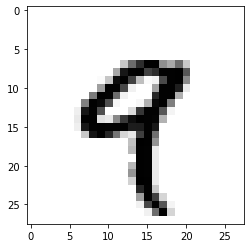

In [77]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [0]:
train_images = train_images.reshape(60000, 28*28) # 将图片按行展开成一维向量
train_images = train_images.astype('float32') / 255 # 将图片进行归一化

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32') / 255

In [0]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [0]:
train_labels = to_categorical(train_labels)
test_labels_for_sklearn_acc = test_labels
test_labels = to_categorical(test_labels)

In [0]:
# 构建网络，只有两层
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['accuracy'])

In [81]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 1s 21us/step - loss: 0.2253 - accuracy: 0.9316
Epoch 2/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0836 - accuracy: 0.9740
Epoch 3/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0562 - accuracy: 0.9825
Epoch 4/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0395 - accuracy: 0.9876
Epoch 5/5
60000/60000 [==============================] - 1s 20us/step - loss: 0.0293 - accuracy: 0.9908


In [82]:
eval = network.evaluate(test_images, test_labels)
print("loss:", eval[0])
print("accuracy: %.1f%%" % (eval[1] * 100))

10000/10000 [==============================] - 0s 47us/step
loss: 0.07480059083989618
accuracy: 98.1%


In [84]:
import numpy as np
from sklearn.metrics import accuracy_score

test_predict = network.predict(test_images) # test_images
test_predict = np.argmax(test_predict, axis=1)

print("正确率：%f" % accuracy_score(test_predict, test_labels_for_sklearn_acc)) # 这里的test_predict和test_labels_for_sklearn_acc都为(10000, 1)的维度

正确率：0.980600
